## Fashion MNIST Dataset

* Dataset of Zalando's article images — 
    * Training set of $60,000$ examples
    * Test set of $10,000$ examples. 
    * Each example is a $28 \times 28$ grayscale image, associated with a label from $10$ classes. 
    * Each image is $28$ pixels in height and $28$ pixels in width, for a total of 784 pixels in total. 
    * Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. 
    * This pixel-value is an integer between $0$ and $255$. 

### Importing Libraries for Manipulating and Visualising Data

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import time

### Loading the Fashion MNIST Dataset
* No need to further splitting of data
* Loads in terms of both training and testing data.

In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print("X_train shape:" + str(X_train.shape))
print("y_train shape:" + str(y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("y_test shape:" + str(y_test.shape))

X_train shape:(60000, 28, 28)
y_train shape:(60000,)
X_test shape:(10000, 28, 28)
y_test shape:(10000,)


* $\texttt{Normalizing}$ the dataset

In [4]:
X_train = X_train/255.0
X_test = X_test/255.0

### Visualizing the data

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

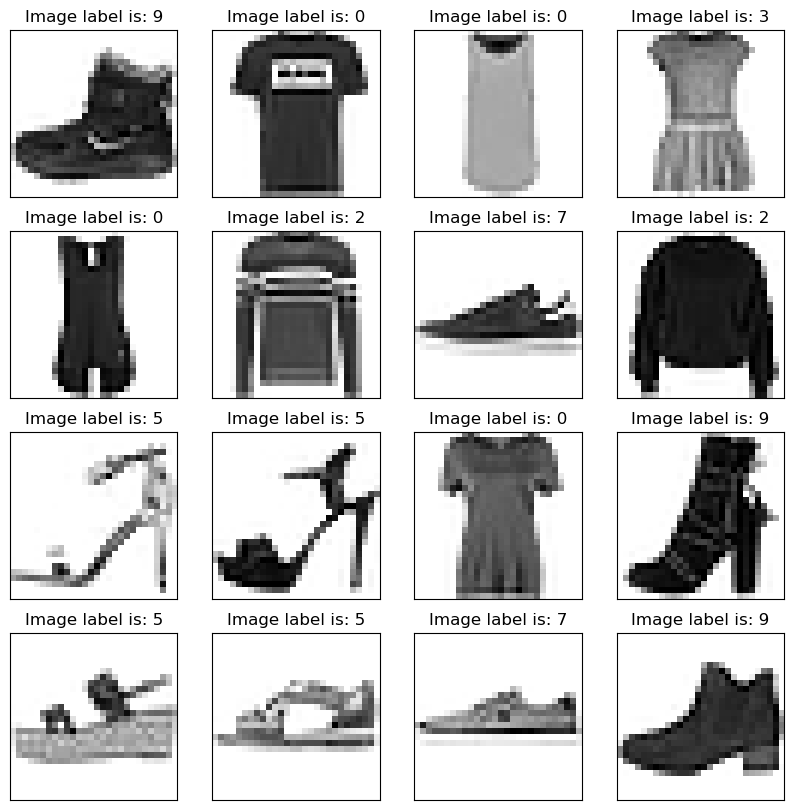

In [6]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.title("Image label is: {}".format(y_train[i]))
plt.show()

* $\texttt{Reshaping}$ both the training and testing data

In [7]:
X_train = X_train.reshape(60000,-1)
X_test = X_test.reshape(10000,-1)

### Checking for Unknown Values
* There is no unknown value in our datasets. 
* Let's, move to further preprocessing.

In [8]:
c = 'False'
a = pd.DataFrame(X_train)
for i in range(0, 784):
    if a.iloc[:, i].isnull().values.any() == True:
        c = True
        break
print("Is any value in training data unknown =", c)

c = 'False'
b = pd.DataFrame(X_test)
for i in range(0, 784):
    if b.iloc[:, i].isnull().values.any() == True:
        c = True
        break
print("Is any value in testing data unknown =", c)

Is any value in training data unknown = False
Is any value in testing data unknown = False


### Logistic Regression on Fully Labelled Dataset
* Now let's fit a Logistic Regression model and evaluate it on the test set

In [9]:
start_time = time.time()
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
end_time = time.time()
print(log_reg.score(X_test, y_test))
print(f"Total time taken = {end_time-start_time}")

0.841
Total time taken = 326.0697326660156


In [10]:
print('Number of iterations =', log_reg.n_iter_[0])

Number of iterations = 585


* Okay, that's our baseline: $\texttt{84.10%}$ accuracy. 
* Let's see if we can do better by using $\texttt{K-Means}$ as a preprocessing step.
* Since, out of $5000$ max iterations, the baseline model needed only $585$ iterations to converge, so we will restrict to $600$ iterations for now onwards.

### Clustering the Training Dataset
*  Create a pipeline that will first cluster the training set into $k$ clusters 
*  Replace the images with their distances to the $k$ clusters
*  Apply a logistic regression model
*  Compared accuracy w.r.t number of clusters = $100$, $200$ and $300$

In [11]:
k=[100,200,300]
start_time = time.time()
for i in k:
    pipeline = Pipeline([("kmeans", KMeans(n_clusters=i, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=600, random_state=42))])
    pipeline.fit(X_train, y_train)
    print(f"No. of cluster = {i}, Accuracy = {pipeline.score(X_test, y_test)}")
end_time = time.time()
print(f"Total time taken = {end_time-start_time}")    

C:\Users\skund\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\skund\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No. of cluster = 100, Accuracy = 0.8235


C:\Users\skund\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\skund\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No. of cluster = 200, Accuracy = 0.8375


C:\Users\skund\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\skund\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No. of cluster = 300, Accuracy = 0.8437
Total time taken = 4796.243581295013


### Comparing models on considering varying labelled instances
* For each $k$, we have taken first k data points that are labelled
* Fit a logistic regression model
* Computed accuracy for the same

In [12]:
k=[1000,2000,3000]
start_time=time.time()
for i in k:
    log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=600, random_state=42)
    log_reg.fit(X_train[:i], y_train[:i])
    print(f"Labelled Instance = {i}, Accuracy = {log_reg.score(X_test, y_test)}")
end_time = time.time()
print(f"Total time taken = {end_time-start_time}")

Labelled Instance = 1000, Accuracy = 0.7875
Labelled Instance = 2000, Accuracy = 0.8042
Labelled Instance = 3000, Accuracy = 0.8084
Total time taken = 11.406967401504517


* Our logistic regression model performed better for large no. of instances ($3000$).
* So for all the next experiments, I have worked with large cluster sizes, i.e. $3000$. 
* Earlier, the model performed better for large no. of clusters $k=300$ with accuracy $84.38\%$.

### Clustering for Semi-Supervised Learning
* Number of clusters = $\texttt{3000}$
* First, let's cluster the training set into $3000$ clusters
* Then for each cluster let's find the image closest to the centroid
* These items are the representative items

In [13]:
start_time=time.time()
kmeans = KMeans(n_clusters=3000, random_state=42)
X_items_dist = kmeans.fit_transform(X_train)
representative_item_idx = np.argmin(X_items_dist, axis=0)
X_representative_items = X_train[representative_item_idx]
end_time = time.time()
print(f"Total time taken = {end_time-start_time}")

C:\Users\skund\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Total time taken = 5457.523195505142


In [14]:
y_train[representative_item_idx]

array([1, 6, 8, ..., 5, 5, 5], dtype=uint8)

In [15]:
y_representative_items = np.array(y_train[representative_item_idx])

* Dataset with just $3000$ labeled instances, each of them is a representative item of its cluster. 
* Let's see if the performance is any better.

In [16]:
start_time=time.time()
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=600, random_state=42)
log_reg.fit(X_representative_items, y_representative_items)
end_time = time.time()
print(log_reg.score(X_test, y_test))
print(f"Total time taken = {end_time-start_time}")

0.8132
Total time taken = 4.480737209320068


* Current Accuracy of the model is $\texttt{81.32%}$ 

### Clustering and Propagating the Labels to other Instances in the Same Cluster

* But perhaps we can go one step further,
    * What if we propagated the labels to all the other instances in the same cluster?

In [17]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(3000):
    y_train_propagated[kmeans.labels_==i] = y_representative_items[i]

In [18]:
start_time=time.time()
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=600, random_state=42)
log_reg.fit(X_train, y_train_propagated)
end_time = time.time()
print(log_reg.score(X_test,y_test))
print(f"Total time taken = {end_time-start_time}")

C:\Users\skund\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.815
Total time taken = 254.97453546524048


* We got a tiny little accuracy boost to $\texttt{81.50%}$
* Better than nothing, but we should probably have propagated the labels only to the instances closest to the centroid.
* Because by propagating to the full cluster, we have certainly included some outliers.

### Propagating the Labels to Some Certain Percentile Closest to the Centroid

* Let's only propagate the labels to the $25^{th}$ percentile closest to the centroid
* Accuracy = $\texttt{81.41}\%$ **Dropped!**

In [19]:
percentile_closest = 25

X_cluster_dist = X_items_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(3000):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [20]:
start_time = time.time()
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=600, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
end_time = time.time()
print(f"Percentile Closest = {percentile_closest}, Accuracy = {log_reg.score(X_test,y_test)}")
print(f"Total time taken = {end_time-start_time}")

Percentile Closest = 25, Accuracy = 0.8141
Total time taken = 44.94329237937927


In [21]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.8820842079269046

* Let's only propagate the labels to the $50^{th}$ percentile closest to the centroid
* Accuracy = $\texttt{81.67}\%$ **Improved!**

In [30]:
percentile_closest = 50

X_cluster_dist = X_items_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(3000):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [31]:
start_time = time.time()
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=600, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
end_time = time.time()
print(f"Percentile Closest = {percentile_closest}, Accuracy = {log_reg.score(X_test,y_test)}")
print(f"Total time taken = {end_time-start_time}")

C:\Users\skund\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Percentile Closest = 50, Accuracy = 0.8167
Total time taken = 101.41505575180054


In [32]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.8559360582234063

* Let's only propagate the labels to the $75^{th}$ percentile closest to the centroid
* Accuracy = $\texttt{81.57}\%$ **Improved a bit!**

In [33]:
percentile_closest = 75

X_cluster_dist = X_items_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(3000):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [34]:
start_time = time.time()
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=600, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
end_time = time.time()
print(f"Percentile Closest = {percentile_closest}, Accuracy = {log_reg.score(X_test,y_test)}")
print(f"Total time taken = {end_time-start_time}")

C:\Users\skund\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Percentile Closest = 75, Accuracy = 0.8157
Total time taken = 163.5127613544464


In [35]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.8376091336467428

### Concluding Remarks

* The propagated labels are actually pretty good, their accuracy is close to $\texttt{85.59}\%$ which is the highest for $50^{th}$ percentile closest to the centroid.
* I have got the highest accuracy of the model to be $\texttt{81.67}\%$ for the propagated labelled instances which are $50^{th}$ percentile closest to the centroid.
* Thus we could get closer to the performance of logistic regression on the fully labelled Fashion-MNIST dataset (which was $\texttt{84.10}\%$).
* Here, we couldn’t increase the accuracy too much (nearly the same) by using semi-supervised learning techniques.
    * Still in some situations when we have completely unlabelled data, using semi-supervised learning techniques we can boost the accuracy of our models by labeling a small part of our data manually, in prior.